<a href="https://colab.research.google.com/github/andrewshiva/Pos-tagging-nlp/blob/master/Pos_tagging_Nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install sklearn

In [0]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [45]:
>>> import nltk
>>> nltk.download('punkt')
>>> nltk.download('twitter_samples')
>>> from nltk.corpus import twitter_samples as ts
>>> ts.fileids()
['negative_tweets.json', 'positive_tweets.json', 'tweets.20150430-  223406.json']
>>> samples_tw = ts.strings('tweets.20150430-223406.json')
>>> samples_tw[20]
"@B0MBSKARE the anti-Scottish feeling is largely a product of Tory press scaremongering. In practice most people won't give a toss!"
>>> from nltk.tokenize import word_tokenize as wtoken
>>> wtoken(samples_tw[20])
['@', 'B0MBSKARE', 'the', 'anti-Scottish', 'feeling', 'is', 'largely', 'a', 'product', 'of', 'Tory', 'press', 'scaremongering', '.', 'In', 'practice', 'most', 'people', 'wo', "n't", 'give', 'a', 'toss', '!']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


['@',
 'B0MBSKARE',
 'the',
 'anti-Scottish',
 'feeling',
 'is',
 'largely',
 'a',
 'product',
 'of',
 'Tory',
 'press',
 'scaremongering',
 '.',
 'In',
 'practice',
 'most',
 'people',
 'wo',
 "n't",
 'give',
 'a',
 'toss',
 '!']

In [18]:
from nltk.tokenize import wordpunct_tokenize
>>> samples_tw[20]
"@B0MBSKARE the anti-Scottish feeling is largely a product of Tory press scaremongering. In practice most people won't give a toss!"
>>> wordpunct_tokenize(samples_tw[20])
['@', 'B0MBSKARE', 'the', 'anti', '-', 'Scottish', 'feeling', 'is', 'largely', 'a', 'product', 'of', 'Tory', 'press', 'scaremongering', '.', 'In', 'practice', 'most', 'people', 'won', "'", 't', 'give', 'a', 'toss', '!']

['@',
 'B0MBSKARE',
 'the',
 'anti',
 '-',
 'Scottish',
 'feeling',
 'is',
 'largely',
 'a',
 'product',
 'of',
 'Tory',
 'press',
 'scaremongering',
 '.',
 'In',
 'practice',
 'most',
 'people',
 'won',
 "'",
 't',
 'give',
 'a',
 'toss',
 '!']

In [19]:
>>> from nltk import regexp_tokenize
>>> patn = '\w+'
>>> regexp_tokenize(samples_tw[20],patn)
['B0MBSKARE', 'the', 'anti', 'Scottish', 'feeling', 'is', 'largely', 'a', 'product', 'of', 'Tory', 'press', 'scaremongering', 'In', 'practice', 'most', 'people', 'won', 't', 'give', 'a', 'toss']

['B0MBSKARE',
 'the',
 'anti',
 'Scottish',
 'feeling',
 'is',
 'largely',
 'a',
 'product',
 'of',
 'Tory',
 'press',
 'scaremongering',
 'In',
 'practice',
 'most',
 'people',
 'won',
 't',
 'give',
 'a',
 'toss']

In [20]:
>>> patn = '\w+|[!,\-,]'
>>> regexp_tokenize(samples_tw[20],patn)
['B0MBSKARE', 'the', 'anti', '-', 'Scottish', 'feeling', 'is', 'largely', 'a', 'product', 'of', 'Tory', 'press', 'scaremongering', 'In', 'practice', 'most', 'people', 'won', 't', 'give', 'a', 'toss', '!']

['B0MBSKARE',
 'the',
 'anti',
 '-',
 'Scottish',
 'feeling',
 'is',
 'largely',
 'a',
 'product',
 'of',
 'Tory',
 'press',
 'scaremongering',
 'In',
 'practice',
 'most',
 'people',
 'won',
 't',
 'give',
 'a',
 'toss',
 '!']

In [21]:
>>> import nltk
>>> from nltk.stem import PorterStemmer
>>> stemming = PorterStemmer()
>>> stemming.stem("enjoying")
'enjoy'
>>> stemming.stem("enjoys")
'enjoy'
>>> stemming.stem("enjoyable")
'enjoy'

'enjoy'

In [22]:
>>> import nltk
>>> from nltk.stem import PorterStemmer
>>> stemming.stem("variation")
'variat'
>>> stemming.stem("variate")
'variat'

'variat'

In [23]:
>>> from nltk.stem import RegexpStemmer
>>> regexp_stemmer = RegexpStemmer("able$|ing$",min=4)
>>> regexp_stemmer.stem("flyable")
'fly'
>>> regexp_stemmer.stem("flying")
'fly'

'fly'

In [24]:
>>> from nltk.corpus import stopwords
>>> nltk.download('stopwords')
>>> sw_l = stopwords.words('english')
>>> sw_l[20:40]
['himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this']

In [25]:
>>> example_text = "This is an example sentence to test stopwords"
>>> example_text_without_stopwords=[word for word in example_text.split() if word not in sw_l]
>>> example_text_without_stopwords
['This', 'example', 'sentence', 'test', 'stopwords']

['This', 'example', 'sentence', 'test', 'stopwords']

In [26]:
>>> from nltk.corpus import gutenberg
>>> nltk.download('gutenberg')
>>> words_in_hamlet = gutenberg.words('shakespeare-hamlet.txt')
>>> words_in_hamlet_without_sw = [word for word in words_in_hamlet if word not in sw_l]
>>> len(words_in_hamlet_without_sw)*100.0/len(words_in_hamlet)


[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


69.26124197002142

In [27]:
>>> import nltk
>>> nltk.download('webtext')
>>> from nltk.corpus import webtext
>>> webtext_sentences = webtext.sents('firefox.txt')
>>> webtext_words = webtext.words('firefox.txt')
>>> len(webtext_sentences)
1142
>>> len(webtext_words)

[nltk_data] Downloading package webtext to /root/nltk_data...
[nltk_data]   Package webtext is already up-to-date!


102457

In [28]:
>>> vocabulary = set(webtext_words)
>>> len(vocabulary)
8296

8296

In [29]:
>>> frequency_dist = nltk.FreqDist(webtext_words)
>>> sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:30]
['.', 'in', 'to', '"', 'the', "'", 'not', '-', 'when', 'on', 'a', 'is', 't', 'and', 'of', '(', 'page', 'for', 'with', ')', 'window', 'Firefox', 'does', 'from', 'open', ':', 'menu', 'should', 'bar', 'tab']

['.',
 'in',
 'to',
 '"',
 'the',
 "'",
 'not',
 '-',
 'when',
 'on',
 'a',
 'is',
 't',
 'and',
 'of',
 '(',
 'page',
 'for',
 'with',
 ')',
 'window',
 'Firefox',
 'does',
 'from',
 'open',
 ':',
 'menu',
 'should',
 'bar',
 'tab']

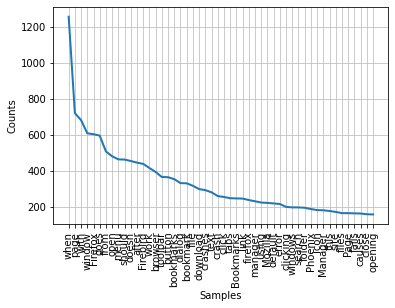

In [30]:
>>> large_words = dict([(k,v) for k,v in frequency_dist.items() if len(k)>3])
>>> frequency_dist = nltk.FreqDist(large_words)
>>> frequency_dist.plot(50,cumulative=False)

In [0]:
!pip install wordcloud

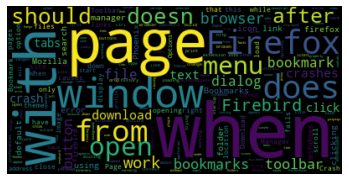

In [31]:
>>> from wordcloud import WordCloud
>>> wcloud = WordCloud().generate_from_frequencies(frequency_dist)
>>> import matplotlib.pyplot as plt
>>> plt.imshow(wcloud, interpolation='bilinear')
>>> plt.axis("off")
(-0.5, 399.5, 199.5, -0.5)
>>> plt.show()

In [32]:
>>> words_in_webtext_without_sw = [word for word in webtext_words if word not in sw_l]
>>> 'when' in words_in_webtext_without_sw
False
>>> 'from' in words_in_webtext_without_sw
False

False

In [33]:
>>> from nltk.corpus import brown
>>> nltk.download('universal_tagset')
>>> nltk.download('brown')
>>> brown.tagged_words()[30:40]
[('term-end', 'NN'), ('presentments', 'NNS'), ('that', 'CS'), ('the', 'AT'), ('City', 'NN-TL'), ('Executive', 'JJ-TL'), ('Committee', 'NN-TL'), (',', ','), ('which', 'WDT'), ('had', 'HVD')]
>>> brown.tagged_words(tagset='universal')[30:40]
[('term-end', 'NOUN'), ('presentments', 'NOUN'), ('that', 'ADP'), ('the', 'DET'), ('City', 'NOUN'), ('Executive', 'ADJ'), ('Committee', 'NOUN'), (',', '.'), ('which', 'DET'), ('had', 'VERB')]

[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


[('term-end', 'NOUN'),
 ('presentments', 'NOUN'),
 ('that', 'ADP'),
 ('the', 'DET'),
 ('City', 'NOUN'),
 ('Executive', 'ADJ'),
 ('Committee', 'NOUN'),
 (',', '.'),
 ('which', 'DET'),
 ('had', 'VERB')]

In [34]:
>>> import nltk
>>> nltk.download('averaged_perceptron_tagger')
>>> text1 = nltk.word_tokenize("I left the room")
>>> text2 = nltk.word_tokenize("Left of the room")
>>> nltk.pos_tag(text1,tagset='universal')
[('I', 'PRON'), ('left', 'VERB'), ('the', 'DET'), ('room', 'NOUN')]
>>> nltk.pos_tag(text2, tagset='universal')
[('Left', 'NOUN'), ('of', 'ADP'), ('the', 'DET'), ('room', 'NOUN')]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('Left', 'NOUN'), ('of', 'ADP'), ('the', 'DET'), ('room', 'NOUN')]

In [35]:
>>> import nltk
>>> nltk.download('maxent_ne_chunker')
>>> nltk.download('words')
>>> from sklearn import tree
>>> example_sent = nltk.word_tokenize("The company is located in South Africa")
>>> example_sent
['The', 'company', 'is', 'located', 'in', 'South', 'Africa']
>>> tagged_sent = nltk.pos_tag(example_sent)
>>> tagged_sent
[('The', 'DT'), ('company', 'NN'), ('is', 'VBZ'), ('located', 'VBN'), ('in', 'IN'), ('South', 'NNP'), ('Africa', 'NNP')]
>>> nltk.ne_chunk(tagged_sent)
('S', [('The', 'DT'), ('company', 'NN'), ('is', 'VBZ'), ('located', 'VBN'), ('in', 'IN'), ('GPE', [('South', 'NNP'), ('Africa', 'NNP')])])


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


('S',
 [('The', 'DT'),
  ('company', 'NN'),
  ('is', 'VBZ'),
  ('located', 'VBN'),
  ('in', 'IN'),
  ('GPE', [('South', 'NNP'), ('Africa', 'NNP')])])

In [0]:
def sentence_features(st, ix):
    d_ft = {}
    d_ft['word'] = st[ix]
    d_ft['dist_from_first'] = ix - 0
    d_ft['dist_from_last'] = len(st) - ix
    d_ft['capitalized'] = st[ix][0].upper() == st[ix][0]
    d_ft['prefix1'] = st[ix][0]
    d_ft['prefix2'] = st[ix][:2]
    d_ft['prefix3'] = st[ix][:3]
    d_ft['suffix1'] = st[ix][-1]
    d_ft['suffix2'] = st[ix][-2:]
    d_ft['suffix3'] = st[ix][-3:]
    d_ft['prev_word'] = '' if ix==0 else st[ix-1]
    d_ft['next_word'] = '' if ix==(len(st)-1) else st[ix+1]
    d_ft['numeric'] = st[ix].isdigit()
    return d_ft

In [0]:
def get_untagged_sentence(tagged_sentence):
    [s,t] = zip(*tagged_sentence)
    return list(s)

In [6]:
>>> nltk.download('treebank')
tagged_sentences = nltk.corpus.treebank.tagged_sents(tagset='universal')

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


In [7]:
 nltk.download('universal_tagset')
def ext_ft(tg_sent):
    sent, tag = [], []

    for tg in tg_sent:
        for index in range(len(tg)):
            sent.append(sentence_features(get_untagged_sentence(tg), index))
            tag.append(tg[index][1])

    return sent, tag

X,y = ext_ft(tagged_sentences)


[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


In [0]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
n_sample = 20000
dict_vectorizer = DictVectorizer(sparse=False)
X_transformed = dict_vectorizer.fit_transform(X[0:n_sample])
y_sampled = y[0:n_sample]

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X_transformed, y_sampled, test_size=0.2, random_state=123)


In [0]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=4)
rf.fit(X_train,y_train)
def predict_pos_tags(sentence):
 tagged_sentence = []
 features = [sentence_features(sentence, index) for index in range(len(sentence))]
 features = dict_vectorizer.transform(features)
 tags = rf.predict(features)
 return zip(sentence, tags)

In [38]:
test_sentence = "This is a simple POS tagger"
for tagged in predict_pos_tags(test_sentence.split()):
  print(tagged)

('This', 'DET')
('is', 'VERB')
('a', 'DET')
('simple', 'ADJ')
('POS', 'NOUN')
('tagger', 'NOUN')


In [0]:

predictions = rf.predict(X_test)


In [42]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,predictions)

0.9385

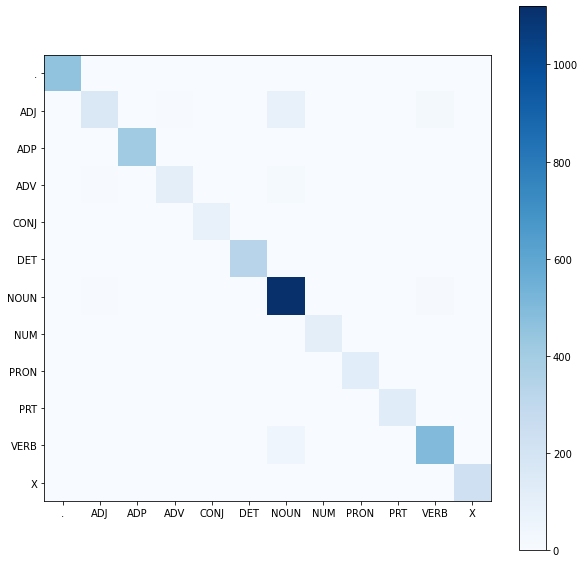

In [46]:
import numpy as np
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,predictions)
plt.figure(figsize=(10,10))
plt.xticks(np.arange(len(rf.classes_)),rf.classes_)
plt.yticks(np.arange(len(rf.classes_)),rf.classes_)
plt.imshow(conf_matrix,cmap=plt.cm.Blues)
plt.colorbar()

In [47]:
feature_list = zip(dict_vectorizer.get_feature_names(),rf.feature_importances_)
sorted_features = sorted(feature_list,key=lambda x: x[1], reverse=True)
print(sorted_features[0:20])

[('capitalized', 0.01721811996099733), ('prefix1=*', 0.015887840028557566), ('dist_from_last', 0.015024715668683604), ('prefix2=,', 0.011275615590866445), ('suffix2=ed', 0.010642120098231704), ('suffix2=he', 0.010513373115628335), ('prefix2=th', 0.010312091960101744), ('dist_from_first', 0.009940821505713071), ('prefix3=,', 0.009809549362804424), ('prefix3=the', 0.009079659641562609), ('suffix1=d', 0.009066575907795357), ('word=the', 0.008968697252306718), ('suffix3=the', 0.008061259694180839), ('suffix3=,', 0.007969100718874316), ('next_word=', 0.00708365009675524), ('word=,', 0.006781566633071492), ('suffix1=s', 0.006627618306860482), ('suffix1=,', 0.006356628734905583), ('word=and', 0.006271798762795746), ('prefix1=t', 0.005998993809357681)]
